In [1]:
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import epitopepredict as ep
from epitopepredict import base, sequtils, analysis, plotting
from mhcflurry import Class1AffinityPredictor

This code is used to compare the results for three virus SARS-CoV-2,SARS-CoV, HCoV-OC43. It also creates various comparative plots

In [2]:
# Load data
df1=pd.read_csv("../Data/Covid_summary.csv")
df2=pd.read_csv("../Data/Sars_summary.csv")
df3=pd.read_csv("../Data/HCOV_summary.csv")

Each of these CSV files contans 5 columns

an index

allele: the allele considered

EC50: the value of the total binding affinity for each allele (also known as Ktot).

peptide: the number of strongly binding peptides (with affinity less than 1000nM).

virus: the virus considered (SARS-CoV-2 or SARS-CoV or HCoV-OC43)

In [3]:
#Join data
dftot=df1.append(df2)
dftot=dftot.append(df3)

In [4]:
# divide df in HLA-A,B,C
HLAA4=dftot[dftot["allele"].str.contains("HLA-A")]
HLAB4=dftot[dftot["allele"].str.contains("HLA-B")]
HLAC4=dftot[dftot["allele"].str.contains("HLA-C")]
HLAA4=HLAA4.sort_values("EC50",ascending=False)
HLAB4=HLAB4.sort_values("EC50",ascending=False)
HLAC4=HLAC4.sort_values("EC50",ascending=False)

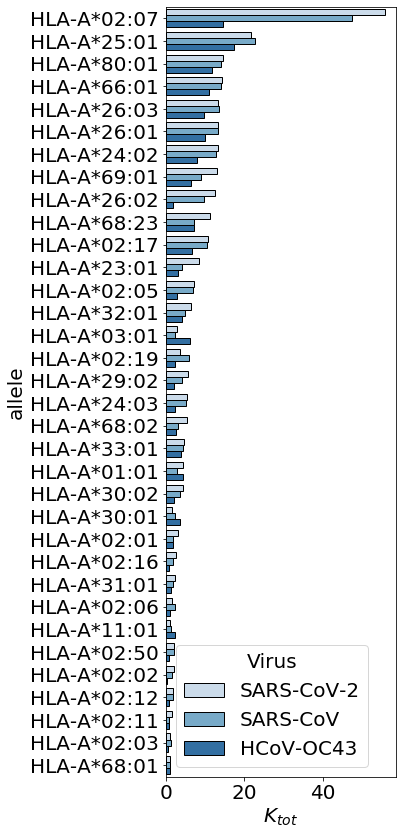

In [51]:
# Plot Ktot
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 20})
ax=sns.barplot(data=HLAA4,x="EC50",y="allele", palette='Blues', hue='Virus', linewidth=1, edgecolor="0")
ax.set_xlabel(r"$K_{tot}$")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = plt.gcf()
ax.set_size_inches(6, 12)
plt.tight_layout()
plt.savefig("../FIGURES/compare-sars-covid-HCOV-A.png", dpi=150)

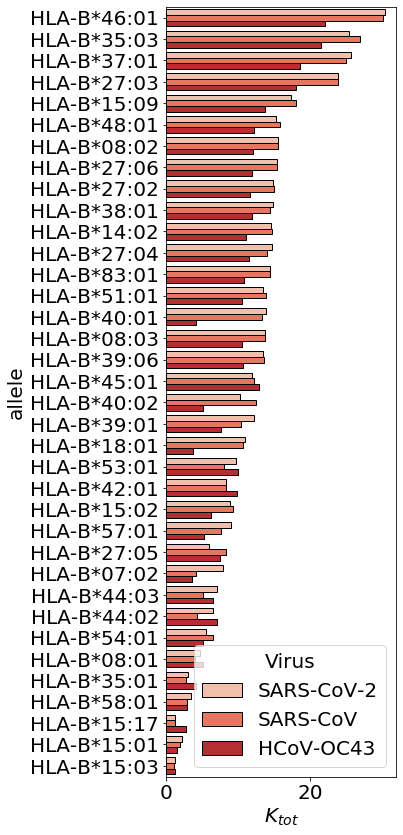

In [53]:
# Plot Ktot
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 20})
ax=sns.barplot(data=HLAB4,x="EC50",y="allele", palette='Reds', hue='Virus', linewidth=1, edgecolor="0")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel(r"$K_{tot}$")
ax = plt.gcf()
ax.set_size_inches(6, 12)
plt.tight_layout()
plt.savefig("../FIGURES/compare-sars-covid-HCOV-B.png", dpi=150)

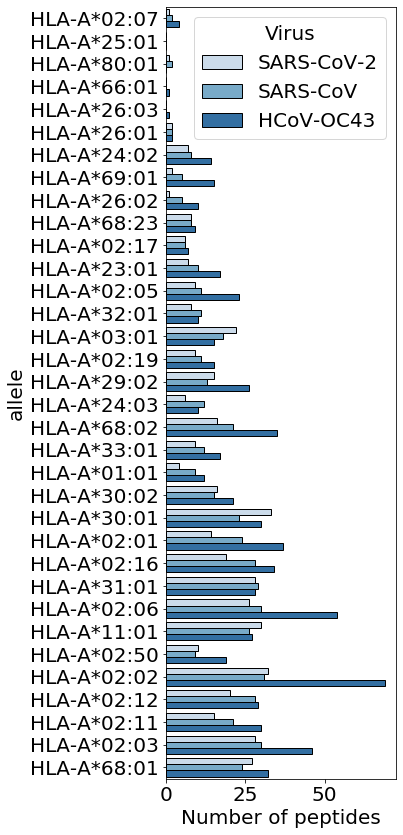

In [6]:
# Plot
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 20})
ax=sns.barplot(data=HLAA4,x="peptide",y="allele", palette='Blues', hue='Virus', linewidth=1, edgecolor="0")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Number of peptides")
ax = plt.gcf()
ax.set_size_inches(6, 12)
plt.tight_layout()
#plt.savefig("../FIGURES/compare-sars-covid-HCOV_number-A.png", dpi=150)

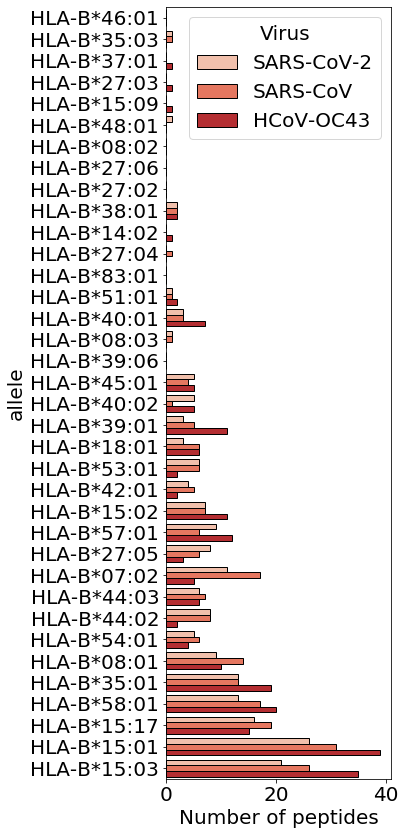

In [7]:
# Plot N peptides
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 20})
ax=sns.barplot(data=HLAB4,x="peptide",y="allele", palette='Reds', hue='Virus', linewidth=1, edgecolor="0")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Number of peptides")
ax = plt.gcf()
ax.set_size_inches(6, 12)
plt.tight_layout()
#plt.savefig("../FIGURES/compare-sars-covid-HCOV_number-B.png", dpi=150)

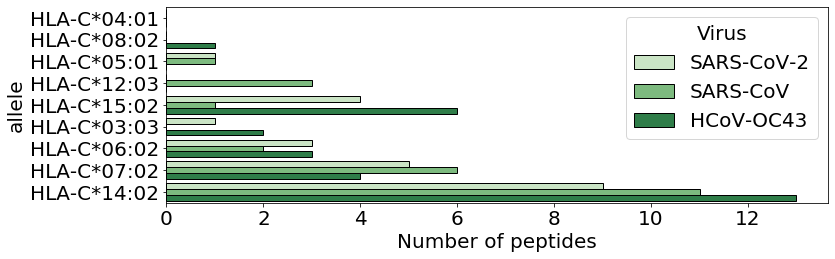

In [8]:
# Plot N peptides
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 20})
ax=sns.barplot(data=HLAC4,y="allele",x="peptide", palette='Greens',hue_order=["SARS-CoV-2","SARS-CoV","HCoV-OC43"], hue="Virus", linewidth=1, edgecolor="0")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Number of peptides")
ax = plt.gcf()
ax.set_size_inches(12, 4)
plt.tight_layout()
#plt.savefig("../FIGURES/compare-sars-covid-HCOV_number-C.png", dpi=150)

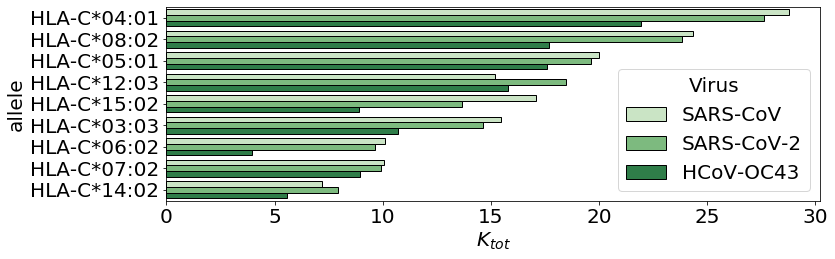

In [55]:
# Plot Ktot
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 20})
ax=sns.barplot(data=HLAC4,y="allele",x="EC50", palette='Greens', hue="Virus", linewidth=1, edgecolor="0")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set_xlabel("Number of peptides")
ax.set_xlabel(r"$K_{tot}$")
ax = plt.gcf()
ax.set_size_inches(12, 4)
plt.tight_layout()
plt.savefig("../FIGURES/compare-sars-covid-HCOV-C.png", dpi=150)

In [17]:
# Load data on peptides
dfpep1=pd.read_csv("../Data/COVID_peptides.csv")
dfpep2=pd.read_csv("../Data/SARS_peptides.csv")
dfpep3=pd.read_csv("../Data/HCOV_peptides.csv")

These csv files contain the list of peptides for the three virus. The colums report:

an index

peptide: the peptide sequence

allele: the allele considered

prediction: the binding affinity computed by MHCflurry

prediction2: the binding affinity computed by netMHCpan 4.0

delta_p: the relative difference between the two predictions

K_tot: 2./(prediction+prediction2) (inverse of the average binding affinity)


In [18]:
dfpep1["Virus"]="SARS-CoV-2"
dfpep2["Virus"]="SARS-CoV"
dfpep3["Virus"]="HCoV-OC43"

In [19]:
# merge SARS-CoV-2 and SARS-CoV
result = pd.merge(dfpep1,dfpep2, on=['peptide','allele'],how="left")


In [20]:
result2=result.dropna()

In [21]:
# count peptides
pep=result2.groupby(["peptide"],as_index=False).count()
pep=pep.sort_values("allele", ascending=False)
pep1=pep[pep["allele"]>1].copy()

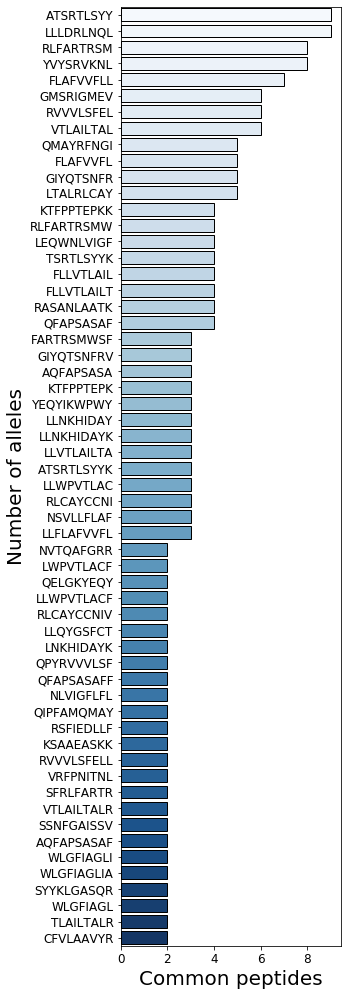

In [22]:
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 12})
ax=sns.barplot(data=pep1,y="peptide",x="allele", palette="Blues", linewidth=1, edgecolor="0")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("Number of alleles", fontsize=20)
ax.set_xlabel("Common peptides", fontsize=20)
ax = plt.gcf()
ax.set_size_inches(5, 14)
plt.tight_layout()
#plt.savefig("../FIGURES/peptides-sars-covid.png", dpi=150)

In [23]:
result=result.fillna(0.)

In [24]:
# find differences
different2=result[result["K_tot_y"]==0.]

In [25]:
sum=different2.groupby(["allele"],as_index=False).count()

In [26]:
result_inv = pd.merge(dfpep2,dfpep1, on=['peptide','allele'],how="left")

In [27]:
result_inv=result_inv.fillna(0.)

In [28]:
different1=result_inv[result_inv["K_tot_y"]==0.]

In [29]:
sum2=different1.groupby(["allele"],as_index=False).count()

In [30]:
sum=sum[["allele","peptide"]]
sum2=sum2[["allele","peptide"]]

In [31]:
sum["Condition"]="In SARS-CoV-2 not in SARS-CoV"
sum2["Condition"]="In SARS-CoV not in SARS-CoV-2"

In [32]:
sum_tot=sum.append(sum2)
sum_tot=sum_tot.sort_values(by="allele")

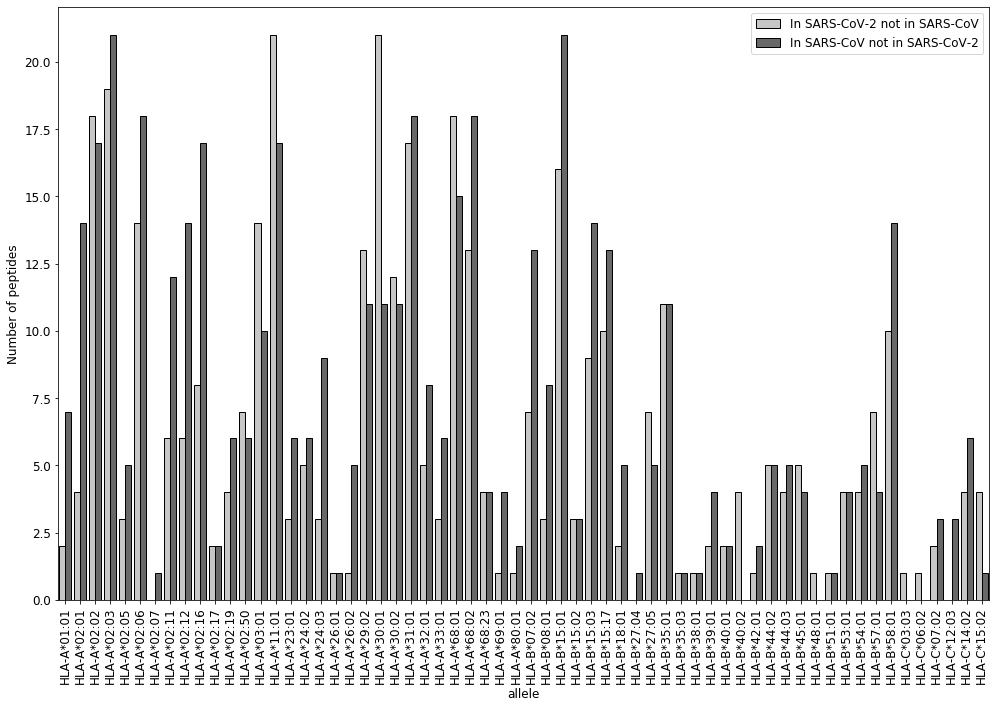

In [33]:
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 12})
ax=sns.barplot(data=sum_tot,y="peptide",x="allele", palette='Greys', hue='Condition', linewidth=1, edgecolor="0")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("Number of peptides")
ax = plt.gcf()
plt.legend(loc='upper right');
#ax.set_xlabel("Number of peptides", fontsize=20)
ax.set_size_inches(14, 10)
plt.tight_layout()
#plt.savefig("../FIGURES/compare-sars-covid-peptides-diff.png", dpi=150)

In the following analysis, we compare the T-cell propensity from NetTepi for SARS-CoV and SARS-CoV-2

In [34]:
dftepi=pd.read_csv("../Data/16969_NetTepi_out-covid.csv",sep='\t')

In [35]:
dfbase=dftepi.drop(dftepi.iloc[:,3:82], axis=1)
dfrest=dftepi.drop(dftepi.iloc[:,0:3], axis=1)
imin=0    
imax=6
dfadd=dfrest.iloc[:,imin:imax]
dfadd.columns = ['Allele','Aff','Stab','Tcell','Comb','Rank']
df_tot=dfbase.join(dfadd)
for i in range(1,13):
    imin=i*6
    imax=(i+1)*6
    dfadd=dfrest.iloc[:,imin:imax]
    dfadd.columns = ['Allele','Aff','Stab','Tcell','Comb','Rank']
    dfadd2=dfbase.join(dfadd)
    frames = [df_tot, dfadd2]
    df_tot=pd.concat(frames)

In [36]:
df_tot['Allele'] = df_tot['Allele'].astype(str)

In [37]:
df_tot['Allele']= df_tot['Allele'].str[:5]+"*"+df_tot['Allele'].str[5:]

In [38]:
df_tot=df_tot.rename(columns={"Peptide":"peptide","Allele":"allele"})

In [39]:
bind_both=result2[["peptide","allele"]]

In [40]:
both=pd.merge(bind_both,df_tot, on=['peptide','allele'],how="left")

In [41]:
both=both.dropna()

In [42]:
both=both.sort_values(by="allele")

In [43]:
both["Name"]=both["allele"]+" "+both["peptide"]

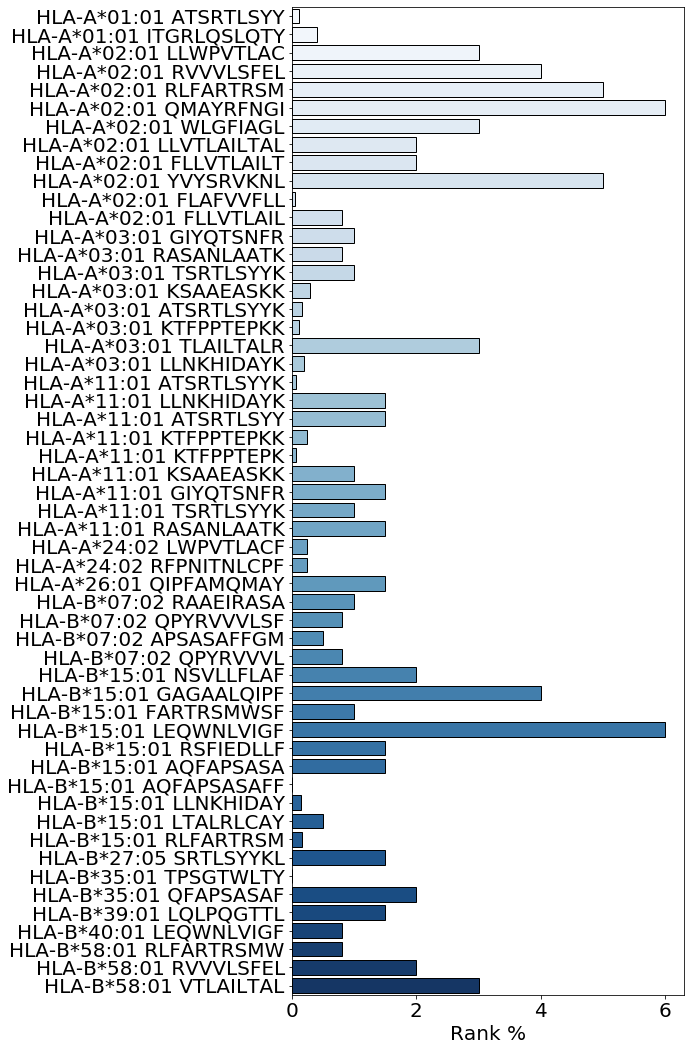

In [45]:
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 20})
ax=sns.barplot(data=both,y="Name",x="Rank", palette="Blues", linewidth=1, edgecolor="0")
ax.set_xlabel("Rank %")
ax.set_ylabel("")
ax = plt.gcf()
ax.set_size_inches(10, 15)
plt.tight_layout()
filename="../FIGURES/peptides-rank.png"
#plt.savefig(filename, dpi=150)
